In [ ]:
!pip install -q scikit-lego
!pip install catboost
!pip install xgboost
!pip install tensorflow_decision_forests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import tensorflow_probability as tfp

import os
import sys
import math
import time
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import tensorflow_probability as tfp

from sklearn.base import clone
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from scipy.spatial.distance import squareform
from sklego.linear_model import LADRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import median_absolute_error, roc_auc_score, roc_curve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninsta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s3e25
!unzip playground-series-s3e25.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/562k [00:00<?, ?B/s]
100% 562k/562k [00:00<00:00, 141MB/s]
Archive:  playground-series-s3e25.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data = pd.read_csv('train.csv', index_col='id')
data.head()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
id                                                                           
0                100.0       0.841611                  10.0            4.8   
1                100.0       7.558488                  10.0            4.8   
2                 76.0       8.885992                  15.6            5.6   
3                100.0       8.795296                  10.0            4.8   
4                116.0       9.577996                  11.6            4.8   

    atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
id                                                                
0              20.612526           11.08810               2.766   
1              20.298893           12.04083               2.755   
2              33.739258           12.08630               2.828   
3              20.213349           10.94850               2.648   
4              24.988133           11.82448               2.766   

    R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
id                                                                  
0                   1.732                  0.860         0.496070   
1                   1.631                  0.910         0.492719   
2                   1.788                  0.864         0.481478   
3                   1.626                  0.936         0.489272   
4                   1.682                  0.896         0.492736   

    density_Average  Hardness  
id                             
0           0.91457       6.0  
1           0.71760       6.5  
2           1.50633       2.5  
3           0.78937       6.0  
4           1.86481       6.0

In [ ]:
print(data.isnull().any())
print(f'Duplicates?: {data.duplicated().any()}')
#data.drop_duplicates(inplace=True)

allelectrons_Total       False
density_Total            False
allelectrons_Average     False
val_e_Average            False
atomicweight_Average     False
ionenergy_Average        False
el_neg_chi_Average       False
R_vdw_element_Average    False
R_cov_element_Average    False
zaratio_Average          False
density_Average          False
Hardness                 False
dtype: bool
Duplicates?: False


array([[<Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>],
       [<Axes: title={'center': 'el_neg_chi_Average'}>,
        <Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>],
       [<Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>,
        <Axes: title={'center': 'Hardness'}>]], dtype=object)

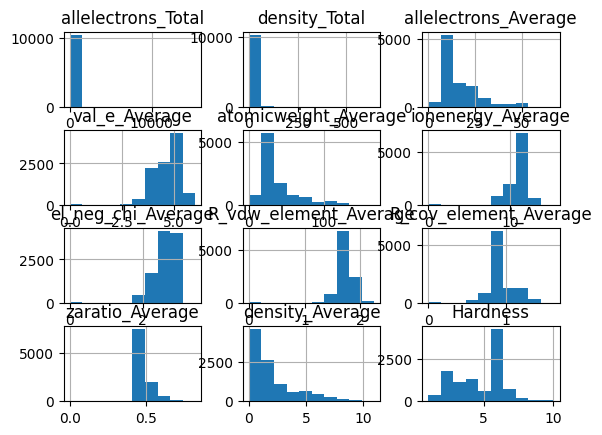

In [ ]:
data.hist()

In [ ]:
data.describe()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
count        10407.000000   10407.000000          10407.000000   10407.000000   
mean           128.053516      14.491342             17.033222       4.546789   
std            224.123776      15.972877             10.468734       0.690864   
min              0.000000       0.000000              0.000000       0.000000   
25%             68.000000       7.558488             10.000000       4.000000   
50%            100.000000      10.650000             12.600000       4.714286   
75%            131.000000      16.676996             22.000000       4.800000   
max          15300.000000     643.093804             67.000000       6.000000   

       atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
count          10407.000000       10407.000000        10407.000000   
mean              37.507703          10.938308            2.607662   
std               26.012313           1.408276            0.334906   
min                0.000000           0.000000            0.000000   
25%               20.298893          10.590660            2.530000   
50%               26.203827          11.202760            2.706000   
75%               48.719500          11.670725            2.805000   
max              167.400000          15.245810            3.443000   

       R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
count           10407.000000           10407.000000     10407.000000   
mean                1.731330               0.944132         0.493349   
std                 0.192481               0.180017         0.063080   
min                 0.000000               0.000000         0.000000   
25%                 1.672500               0.864000         0.476196   
50%                 1.732727               0.915556         0.488550   
75%                 1.800000               0.981667         0.496070   
max                 2.250000               1.615840         0.825990   

       density_Average      Hardness  
count     10407.000000  10407.000000  
mean          2.132984      4.647126  
std           1.936656      1.680525  
min           0.000000      1.000000  
25%           0.814800      3.000000  
50%           1.351550      5.500000  
75%           2.741550      6.000000  
max          10.970000     10.000000

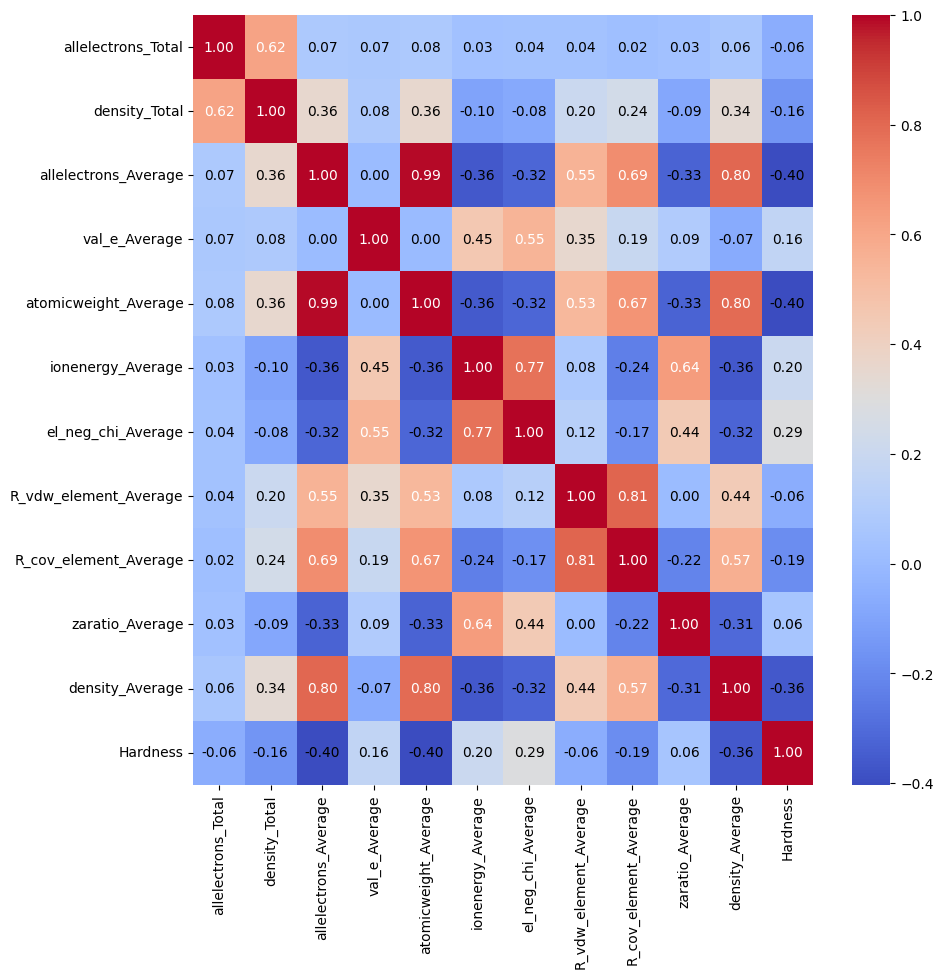

In [ ]:
def highlight_vals(val):
    if val > 0.5:
        return 'white'
    else:
        return 'black'

corr = data.corr()

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Apply custom styling for annotations
for text in heatmap.texts:
    text.set_color(highlight_vals(float(text.get_text())))

plt.show()

In [ ]:
#data.drop(['allelectrons_Total', 'allelectrons_Average'], axis=1, inplace=True)
#data.drop(['atomicweight_Average', 'density_Average'], axis=1, inplace=True)
data.head()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
id                                                                           
0                100.0       0.841611                  10.0            4.8   
1                100.0       7.558488                  10.0            4.8   
2                 76.0       8.885992                  15.6            5.6   
3                100.0       8.795296                  10.0            4.8   
4                116.0       9.577996                  11.6            4.8   

    atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
id                                                                
0              20.612526           11.08810               2.766   
1              20.298893           12.04083               2.755   
2              33.739258           12.08630               2.828   
3              20.213349           10.94850               2.648   
4              24.988133           11.82448               2.766   

    R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
id                                                                  
0                   1.732                  0.860         0.496070   
1                   1.631                  0.910         0.492719   
2                   1.788                  0.864         0.481478   
3                   1.626                  0.936         0.489272   
4                   1.682                  0.896         0.492736   

    density_Average  Hardness  
id                             
0           0.91457       6.0  
1           0.71760       6.5  
2           1.50633       2.5  
3           0.78937       6.0  
4           1.86481       6.0

<Axes: xlabel='allelectrons_Average', ylabel='density_Average'>

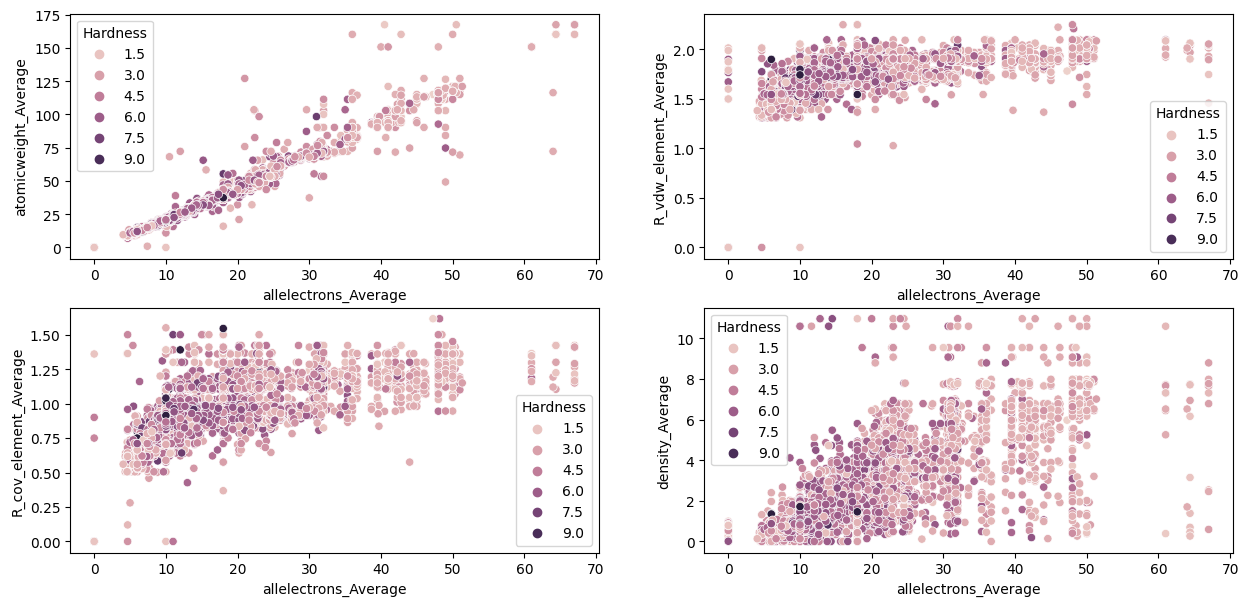

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
sns.scatterplot(data=data, x='allelectrons_Average', y='atomicweight_Average', hue='Hardness')
plt.subplot(222)
sns.scatterplot(data=data, x='allelectrons_Average', y='R_vdw_element_Average', hue='Hardness')
plt.subplot(223)
sns.scatterplot(data=data, x='allelectrons_Average', y='R_cov_element_Average', hue='Hardness')
plt.subplot(224)
sns.scatterplot(data=data, x='allelectrons_Average', y='density_Average', hue='Hardness')

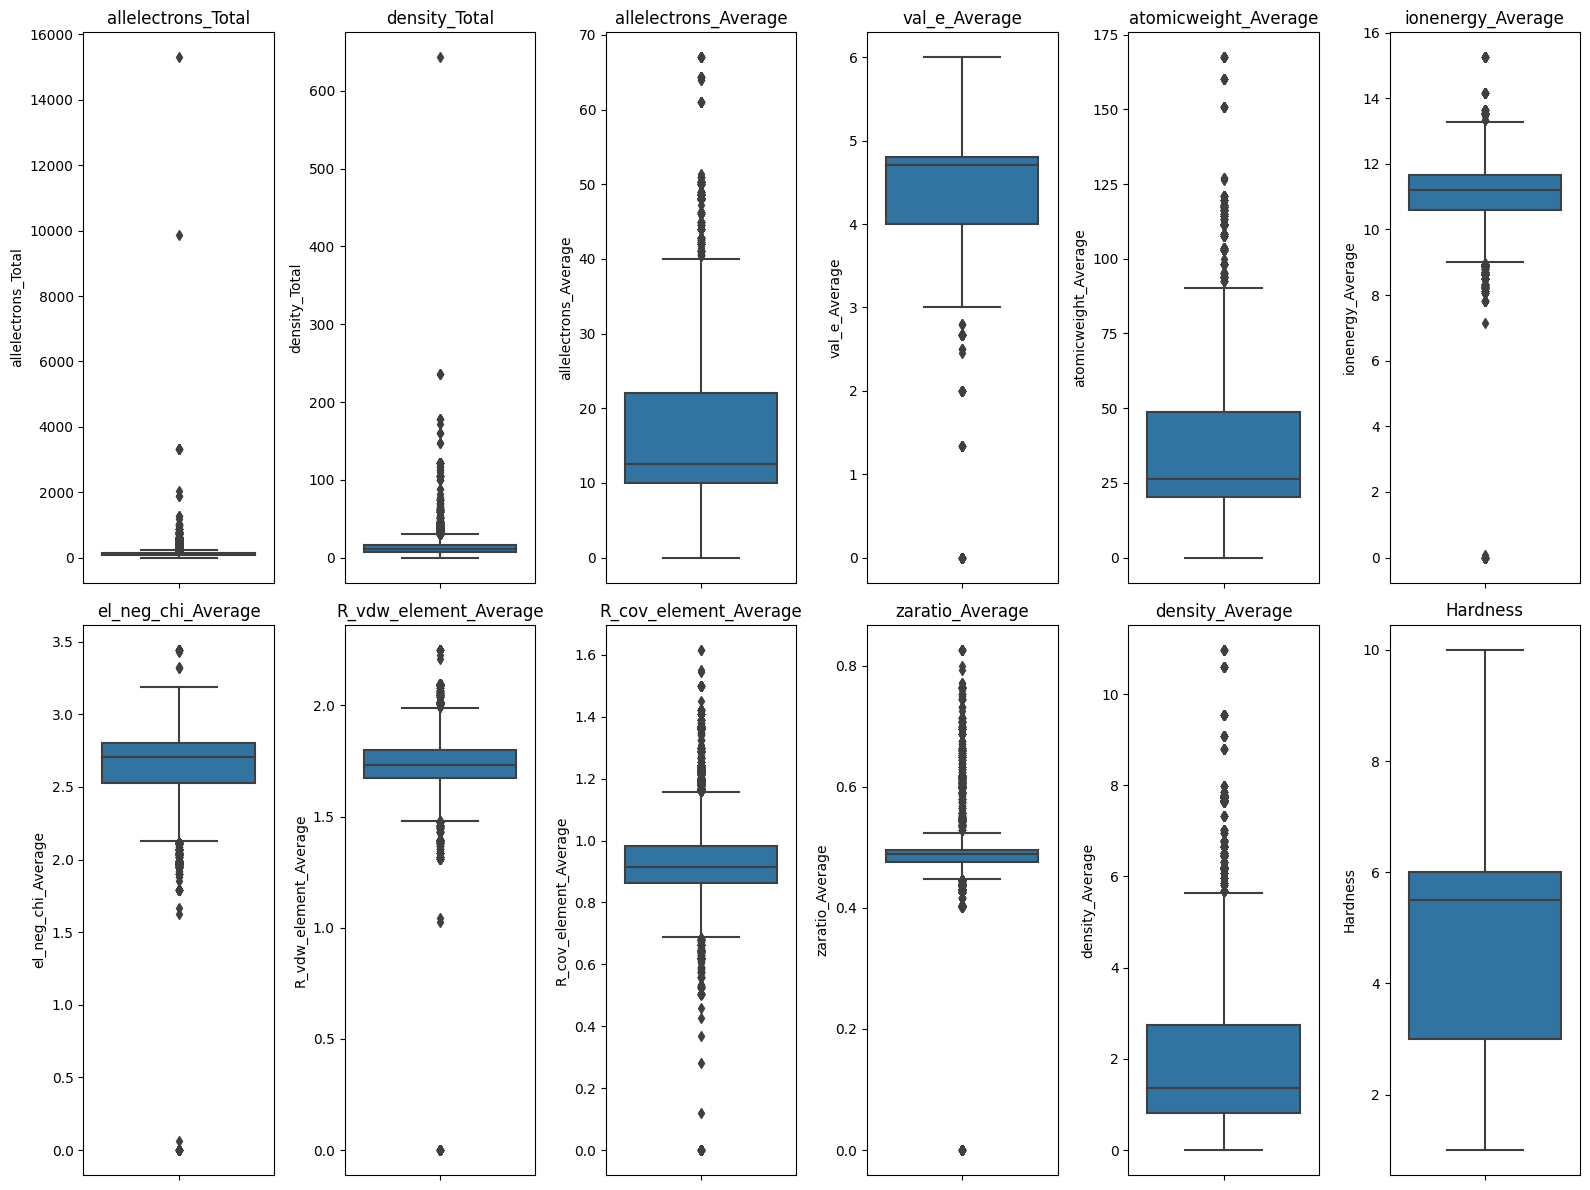

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Loop through each column in the data
for i, column in enumerate(data.columns):
    # Create a subplot for each column
    # The arguments are (nrows, ncols, index)
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()  # Adjusts the layout
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# #winsorize(data.allelectrons_Total, limits=0.025, inplace=True)
# for i in data.columns.to_list():
#   if (i!='Hardness'):
#     winsorize(data[i], limits=0.1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y.head()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

# Predicting

### 1 model

In [ ]:
model_pre = LGBMRegressor()
model_pre.fit(X, y)
X_new = X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126


In [ ]:
def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

def create_model():

    input_layer = tf.keras.Input(shape=(len(features), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.013, beta_1=0.5),
                  loss=loss_fn,
                  metrics=metric_fn)

    return model

model = create_model()
history = model.fit(X_new.astype('float32'), y.astype('float32'),
                    epochs=100,
                    class_weight=model_pre.class_weight,
                    callbacks=callbacks_list,
                    validation_split=0.1)

Epoch 1/1000


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
293/293 [==============================] - ETA: 0s - loss: 1.2333 - metric_fn: 4.4723

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
293/293 [==============================] - 4s 9ms/step - loss: 1.2333 - metric_fn: 4.4723 - val_loss: 0.7734 - val_metric_fn: 3.3503 - lr: 0.0130
Epoch 2/1000
293/293 [==============================] - 2s 7ms/step - loss: 0.8624 - metric_fn: 3.1121 - val_loss: 0.7350 - val_metric_fn: 3.3265 - lr: 0.0130
Epoch 3/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.8013 - metric_fn: 3.0197 - val_loss: 0.7207 - val_metric_fn: 3.1096 - lr: 0.0130
Epoch 4/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.7508 - metric_fn: 3.0022 - val_loss: 0.7217 - val_metric_fn: 3.3271 - lr: 0.0130
Epoch 5/1000
293/293 [============

In [ ]:
test_dataset = pd.read_csv('/content/test.csv')

test_dataset['Hardness_pred'] = model_pre.predict(test_dataset.astype('float32').drop(columns='id'))
test_dataset["Hardness"] = model.predict(test_dataset.astype('float32').drop(columns='id'))
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("submission.csv", index=False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
217/217 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Using a different model: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation to evaluate model performance
scores = cross_val_score(rf_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())

# Fit the model on the entire dataset
rf_model.fit(X_poly, y)

# Prediction and Submission File Creation
test_dataset = pd.read_csv('/content/test.csv')
test_poly = poly.transform(test_dataset.drop(columns='id').astype('float32'))
test_dataset["Hardness"] = rf_model.predict(test_poly)
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("rf_submission.csv", index=False)


Average MSE: 1.5495294757272775


### 2 model

In [ ]:
import tensorflow as tf
import pandas as pd
import tensorflow_probability as tfp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

# Loading your data
# data = pd.read_csv('path_to_your_data.csv')

# Splitting the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fitting a preliminary model to use its predictions as a feature
model_pre = LGBMRegressor()
model_pre.fit(X, y)
X_new = X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

# Custom loss function
def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

# Custom metric function
def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

# Callbacks
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.00001, verbose=2),
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

# Model creation function
def create_model(num_features):
    input_layer = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(32)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
                  loss=loss_fn,
                  metrics=[metric_fn])

    return model

# Creating and training the model
num_features = X_new.shape[1]
model = create_model(num_features)
history = model.fit(X_new.astype('float32'), y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

# Predicting and preparing the submission
test_dataset = pd.read_csv('/content/test.csv')
test_features = test_dataset.drop(columns='id').astype('float32') # Assuming 'id' is the only non-feature column

# Using model_pre to predict 'Hardness_pred' feature
test_features['Hardness_pred'] = model_pre.predict(test_features)

# Using the neural network model to predict 'Hardness'
test_dataset['Hardness'] = model.predict(test_features)

# Preparing the submission file
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("submission.csv", index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126
Epoch 1/100


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
289/293 [============================>.] - ETA: 0s - loss: 1.5526 - metric_fn: 5.0468

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
293/293 [==============================] - 5s 12ms/step - loss: 1.5480 - metric_fn: 5.0317 - val_loss: 0.7080 - val_metric_fn: 3.5994 - lr: 0.0100
Epoch 2/100
 13/293 [>.............................] - ETA: 2s - loss: 1.3551 - metric_fn: 5.1364

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


293/293 [==============================] - 3s 12ms/step - loss: 1.1763 - metric_fn: 4.0114 - val_loss: 0.8600 - val_metric_fn: 3.5768 - lr: 0.0100
Epoch 3/100
293/293 [==============================] - 4s 13ms/step - loss: 1.0924 - metric_fn: 3.8764 - val_loss: 0.7053 - val_metric_fn: 3.0975 - lr: 0.0100
Epoch 4/100
293/293 [==============================] - 2s 5ms/step - loss: 1.0438 - metric_fn: 3.8174 - val_loss: 0.6947 - val_metric_fn: 3.1763 - lr: 0.0100
Epoch 5/100
293/293 [==============================] - 1s 5ms/step - loss: 0.9925 - metric_fn: 3.7363 - val_loss: 0.6165 - val_metric_fn: 3.4019 - lr: 0.0100
Epoch 6/100
293/293 [==============================] - 2s 5ms/step - loss: 0.9286 - metric_fn: 3.3916 - val_loss: 0.6196 - val_metric_fn: 3.1451 - lr: 0.0100
Epoch 7/100
293/293 [==============================] - 1s 5ms/step - loss: 0.8701 - metric_fn: 3.2484 - val_loss: 0.5161 - val_metric_fn: 3.3229 - lr: 0.0100
Epoch 8/100
293/293 [==============================] - 1s 5ms/

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
217/217 [==============================] - 1s 3ms/step


### 3 model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the data
X_train_poly, X_valid_poly, y_train, y_valid = train_test_split(X_poly, y, train_size=0.9, random_state=42)

# Model Definition with more complexity
def create_enhanced_model():
    input_layer = tf.keras.Input(shape=(X_train_poly.shape[1],))
    x = tf.keras.layers.Dense(64, activation='relu')(input_layer)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  loss='mean_squared_error',  # You might want to change this
                  metrics=['mae'])  # You can change this metric as well

    return model

# Training the enhanced model
enhanced_model = create_enhanced_model()
enhanced_history = enhanced_model.fit(X_train_poly, y_train,
                                      epochs=200,  # Increased epochs
                                      callbacks=callbacks_list,
                                      validation_data=(X_valid_poly, y_valid))

Epoch 1/200
293/293 [==============================] - 2s 4ms/step - loss: 1602519168.0000 - mae: 1453.9460 - val_loss: 138064896.0000 - val_mae: 3150.8408 - lr: 0.0050
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 19919204352.0000 - mae: 3262.9565 - val_loss: 54820568.0000 - val_mae: 4778.1504 - lr: 0.0050
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 142176305152.0000 - mae: 9758.0674 - val_loss: 6858663.0000 - val_mae: 1373.6562 - lr: 0.0050
Epoch 4/200
293/293 [==============================] - 2s 6ms/step - loss: 45285904384.0000 - mae: 13834.0361 - val_loss: 896124160.0000 - val_mae: 15972.6006 - lr: 0.0050
Epoch 5/200
293/293 [==============================] - 2s 5ms/step - loss: 249287294976.0000 - mae: 19255.3066 - val_loss: 108030160.0000 - val_mae: 4582.3047 - lr: 0.0050
Epoch 6/200
293/293 [==============================] - 2s 5ms/step - loss: 203452973056.0000 - mae: 22783.1367 - val_loss: 193924736.0000 - val_mae: 

In [ ]:
# Prediction and Submission File Creation
test_dataset = pd.read_csv('/content/test.csv')
test_poly = poly.transform(test_dataset.drop(columns='id').astype('float32'))
test_dataset["Hardness"] = enhanced_model.predict(test_poly)
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("enhanced_submission.csv", index=False)

217/217 [==============================] - 1s 2ms/step


### 4 model

In [ ]:
# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit the scaler on the training data and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the test data
# X_test_scaled = scaler.transform(X_valid)

# # Convert the scaled arrays back into pandas DataFrames
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_valid.columns, index=X_valid.index)

In [ ]:
# X_train_scaled.head()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
id                                                                             
2124            0.000000       0.000000              0.044776       1.000000   
394             0.117318       0.404336              0.626866       0.000000   
3101            0.301676       0.408302              0.139925       0.292969   
1737            0.603352       0.820918              1.000000       0.260417   
561             0.491620       0.871745              0.373134       0.520833   

      atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
id                                                                  
2124              0.044344           1.000000            1.000000   
394               0.708815           0.000000            0.005133   
3101              0.124771           0.645574            0.503722   
1737              1.000000           0.000000            0.000000   
561               0.389778           0.442645            0.553131   

      R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
id                                                                    
2124               0.000000               0.221426         0.281574   
394                1.000000               1.000000         0.204427   
3101               0.405063               0.426523         0.360536   
1737               1.000000               1.000000         0.000000   
561                0.510549               0.476304         0.196449   

      density_Average  
id                     
2124         0.000000  
394          0.918257  
3101         0.267308  
1737         1.000000  
561          0.295372

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 1.173802870884816
MSE: 2.12245650261222
RMSE: 1.4568653000920229
R-squared: 0.21913165886508834


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    print(f'{name} trained.')

    # Predict on test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

# Output results
for name, metrics in results.items():
    print(f'Results for {name}:')
    for metric, value in metrics.items():
        print(f'    {metric}: {value:.4f}')

# Hyperparameter tuning for Random Forest
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_clf = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_squared_error')
rf_clf.fit(X_train_scaled, y_train)

# Output best parameters and model
print(f'Best parameters for Random Forest: {rf_clf.best_params_}')
best_rf_model = rf_clf.best_estimator_

# Evaluate the best Random Forest model
best_rf_y_pred = best_rf_model.predict(X_test_scaled)
print(f'Random Forest - MAE: {mean_absolute_error(y_test, best_rf_y_pred)}')
print(f'Random Forest - MSE: {mean_squared_error(y_test, best_rf_y_pred)}')
print(f'Random Forest - RMSE: {mean_squared_error(y_test, best_rf_y_pred, squared=False)}')
print(f'Random Forest - R2: {r2_score(y_test, best_rf_y_pred)}')


LinearRegression trained.
Ridge trained.
Lasso trained.
DecisionTree trained.
RandomForest trained.
GradientBoosting trained.
SVR trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor trained.
Results for LinearRegression:
    MAE: 1.1738
    MSE: 2.1225
    RMSE: 1.4569
    R2: 0.2191
Results for Ridge:
    MAE: 1.1740
    MSE: 2.1224
    RMSE: 1.4569
    R2: 0.2191
Results for Lasso:
    MAE: 1.4689
    MSE: 2.7183
    RMSE: 1.6487
    R2: -0.0001
Results for DecisionTree:
    MAE: 1.2391
    MSE: 3.0550
    RMSE: 1.7479
    R2: -0.1240
Results for RandomForest:
    MAE: 0.9417
    MSE: 1.6010
    RMSE: 1.2653
    R2: 0.4110
Results for GradientBoosting:
    MAE: 0.9315
    MSE: 1.5163
    RMSE: 1.2314
    R2: 0.4421
Results for SVR:
    MAE: 0.9494
    MSE: 1.7572
    RMSE: 1.3256
    R2: 0.3535
Results for MLPRegressor:
    MAE: 0.9758
    MSE: 1.6667
    RMSE: 1.2910
    R2: 0.3868
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - MAE: 0.93276992609056
Random Forest - MSE: 1.5674636013091352
Random Forest - RMSE: 1.251983866233561
Random Forest - R2: 0.4233178863090016


In [ ]:
import pandas as pd

# Step 1: Load the test data
test_data = pd.read_csv('test.csv')
test_data.drop(['atomicweight_Average', 'density_Average'], axis=1, inplace=True)

# Step 2: Preprocess and scale the test data
# (Assuming that 'id' is the first column and should not be scaled)
test_features = test_data.iloc[:, 1:]  # Exclude 'id' column
test_features_scaled = scaler.transform(test_features)  # Use the same scaler as before

# Step 3: Predict 'Hardness' using the best model
test_predictions = best_rf_model.predict(test_features_scaled)

# Step 4: Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'Hardness': test_predictions
})

# Step 5: Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

# Step 6: Submit the predictions to Kaggle
# kaggle competitions submit -c playground-series-s3e25 -f submission.csv -m "Message"

ValueError: ignored

### 5 model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', device='cuda')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # You can choose a different scorer
    cv=5,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Find the best parameters and the best estimator
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best parameters found: {best_parameters}')

# You can now evaluate the best_model on your test data and proceed with the predictions

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming the scaler has been previously fitted on the training data
# and best_xgb_model is the best model obtained from GridSearchCV

# Step 1: Load the test data
test_data = pd.read_csv('test.csv')

# Optional: If you need to drop certain columns as per preprocessing done during training
#test_data.drop(['atomicweight_Average', 'density_Average'], axis=1, inplace=True)

# Step 2: Preprocess and scale the test data
# (Assuming that 'id' is the first column and should not be scaled)
test_features = test_data.iloc[:, 1:]  # Exclude 'id' column
test_features_scaled = scaler.transform(test_features)  # Use the same scaler as before

# Step 3: Predict 'Hardness' using the best XGBoost model
test_predictions = best_model.predict(test_features_scaled)

# Step 4: Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Ensure this is the correct identifier column from your test set
    'Hardness': test_predictions
})

# Step 5: Save the predictions to a CSV file
submission.to_csv('xgb_submission_1.csv', index=False)

# The last step is to submit the predictions to Kaggle using the command line interface
# The command to submit to Kaggle would be run in your terminal, not in Python.
# Example command:
# kaggle competitions submit -c playground-series-s3e25 -f xgb_submission.csv -m "XGB Model Predictions"


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, median_absolute_error

# Make sure the training data is loaded and preprocessed (X_train_scaled, y_train)

# Step 1: Define the scorer based on Median Absolute Error
medae_scorer = make_scorer(median_absolute_error, greater_is_better=False)

# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Step 3: Initialize the GridSearchCV
xgb_model = XGBRegressor(objective='reg:squarederror', device='cuda')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring=medae_scorer, cv=5, verbose=2)

# Step 4: Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Step 5: Print the best parameters and the best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best Median Absolute Error: {-grid_search.best_score_}')

# Step 6: Use the best estimator to make predictions on the test set
best_xgb_model = grid_search.best_estimator_

test_data = pd.read_csv('test.csv')

test_features = test_data.iloc[:, 1:]  # Exclude 'id' column
test_features_scaled = scaler.transform(test_features)  # Use the same scaler as before

test_predictions = best_xgb_model.predict(test_features_scaled)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Replace with the correct 'id' column from your test set
    'Hardness': test_predictions
})

# Save the submission file
submission.to_csv('xgb_submission.csv', index=False)

# Use the following command in your terminal to submit to Kaggle, not in Python
# kaggle competitions submit -c playground-series-s3e25 -f xgb_submission.csv -m "XGBRegressor with GridSearch"


### 6 model


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Assuming you have already split and scaled your data as per your code snippet
# X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Define a parameter grid to search over
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', device='cuda')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV on the training data
# Note: Here we are using the scaled training data
random_search.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], early_stopping_rounds=10)

# Find the best parameters and the best estimator
best_parameters = random_search.best_params_
best_model = random_search.best_estimator_

print(f'Best parameters found: {best_parameters}')

# Feature Importance Analysis
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.58911
[1]	validation_0-rmse:1.53859
[2]	validation_0-rmse:1.49576
[3]	validation_0-rmse:1.45901
[4]	validation_0-rmse:1.42800
[5]	validation_0-rmse:1.39998
[6]	validation_0-rmse:1.37759
[7]	validation_0-rmse:1.35810
[8]	validation_0-rmse:1.34079
[9]	validation_0-rmse:1.32672
[10]	validation_0-rmse:1.31412
[11]	validation_0-rmse:1.30361
[12]	validation_0-rmse:1.29504
[13]	validation_0-rmse:1.28728
[14]	validation_0-rmse:1.28098
[15]	validation_0-rmse:1.27610
[16]	validation_0-rmse:1.27089
[17]	validation_0-rmse:1.26597
[18]	validation_0-rmse:1.26251
[19]	validation_0-rmse:1.25903
[20]	validation_0-rmse:1.25645
[21]	validation_0-rmse:1.25445
[22]	validation_0-rmse:1.25225
[23]	validation_0-rmse:1.25162
[24]	validation_0-rmse:1.24945
[25]	validation_0-rmse:1.24780
[26]	validation_0-rmse:1.24575
[27]	validation_0-rmse:1.24521
[28]	validation_0-rmse:1.24445
[29]	validation_0-rmse:1.24411
[30]	validation_0-rmse:1.24299
[31]	validation_0-rmse:1.24103
[32]	validation_0-

ValueError: ignored

In [ ]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Assuming 'id' is a column in test_data that was not present during training
# Remove 'id' column before scaling
test_features = test_data.drop('id', axis=1)

# Scale the test data using the already fitted scaler
test_data_scaled = scaler.transform(test_features)

# Predict using the best model
test_predictions = best_model.predict(test_data_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Keep 'id' for the submission file
    'PredictionTarget': test_predictions
})

# Save the predictions to a CSV file
submission.to_csv('xgb_submission.csv', index=False)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:06:58] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


### 7 model

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train.csv', index_col='id')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

# Pre-training with LightGBM
model_pre = LGBMRegressor()
model_pre.fit(X, y)
X_new = X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

# Custom loss and metric functions
def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

# Callbacks configuration
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

# Model creation with increased complexity
def create_model():
    input_layer = tf.keras.Input(shape=(X_new.shape[1],))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Increased neurons
    x = tf.keras.layers.Dropout(0.3)(x)  # Added dropout for regularization
    x = tf.keras.layers.Dense(64, activation='relu')(x)  # Additional layer
    x = tf.keras.layers.Dropout(0.2)(x)  # Added dropout for regularization
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=loss_fn, metrics=metric_fn)
    return model

# Training the model
model = create_model()
history = model.fit(X_new.astype('float32'), y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

# Prediction and submission file creation
test_dataset = pd.read_csv('/content/test.csv')
test_dataset['Hardness_pred'] = model_pre.predict(test_dataset.astype('float32').drop(columns='id'))
test_dataset["Hardness"] = model.predict(test_dataset.astype('float32').drop(columns='id'))
sample_submission = test_dataset[['id', "Hardness"]]
sample_submission.to_csv("submission.csv", index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126
Epoch 1/100
293/293 [==============================] - 3s 4ms/step - loss: 1.8337 - metric_fn: 7.5087 - val_loss: 1.2179 - val_metric_fn: 4.7876 - lr: 0.0100
Epoch 2/100
293/293 [==============================] - 1s 3ms/step - loss: 1.2009 - metric_fn: 4.4841 - val_loss: 1.4850 - val_metric_fn: 3.9671 - lr: 0.0100
Epoch 3/100
293/293 [==============================] - 1s 3ms/step - loss: 1.0598 - metric_fn: 3.9327 - val_loss: 0.7426 - val_metric_fn: 3.6984 - lr: 0.0100
Epoch 4/100
293/293 [==============================] - 1s 3ms/step - loss: 0.9470 - metric_fn: 3.3654 - val_loss: 0.7080 - val_metric_fn: 3.2636 - lr: 0.0100
Epoch 5/100
293/293 [=====

### 8 model

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1_l2

# Load the dataset
data = pd.read_csv('train.csv', index_col='id')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

# Pre-training with LightGBM
model_pre = LGBMRegressor()
model_pre.fit(X, y)
X_new = X.copy()
X_new['Hardness_pred'] = model_pre.predict(X)

# Model creation with further complexity and regularization
def create_model():
    input_layer = tf.keras.Input(shape=(X_new.shape[1],))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=loss_fn, metrics=metric_fn)
    return model

# Training the model with Learning Rate Scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model = create_model()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metric_fn)
history = model.fit(X_new.astype('float32'), y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126
Epoch 1/100
293/293 [==============================] - 4s 5ms/step - loss: 8.0131 - metric_fn: 12.2960 - val_loss: 3.4279 - val_metric_fn: 4.0699 - lr: 0.0100
Epoch 2/100
293/293 [==============================] - 1s 4ms/step - loss: 3.1235 - metric_fn: 4.7322 - val_loss: 2.5664 - val_metric_fn: 3.5220 - lr: 0.0099
Epoch 3/100
293/293 [==============================] - 1s 3ms/step - loss: 2.2900 - metric_fn: 3.8437 - val_loss: 1.8277 - val_metric_fn: 3.9431 - lr: 0.0099
Epoch 4/100
293/293 [==============================] - 1s 3ms/step - loss: 1.8364 - metric_fn: 3.8783 - val_loss: 1.6212 - val_metric_fn: 4.3344 - lr: 0.0099
Epoch 5/100
293/293 [====

In [ ]:
test_dataset = pd.read_csv('/content/test.csv')
test_dataset['Hardness_pred'] = model_pre.predict(test_dataset.astype('float32').drop(columns='id'))
test_dataset["Hardness"] = model.predict(test_dataset.astype('float32').drop(columns='id'))
sample_submission = test_dataset[['id', "Hardness"]]

sample_submission.to_csv("submission_new.csv", index=False)

217/217 [==============================] - 1s 2ms/step


### 9 model

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1_l2

# Load the dataset
data = pd.read_csv('train.csv', index_col='id')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# Pre-training with LightGBM
model_pre = LGBMRegressor(n_estimators=100, learning_rate=0.05)
model_pre.fit(X_train, y_train)

# Adding the predictions as a feature
X_train['Hardness_pred'] = model_pre.predict(X_train)
X_valid['Hardness_pred'] = model_pre.predict(X_valid)

# Model creation
def create_model():
    input_shape = X_train.shape[1]  # Adjusting input shape based on new data
    input_layer = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(input_layer)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Creating and compiling the model
model = create_model()

# Training the model
history = model.fit(X_train.astype('float32'), y_train.astype('float32'),
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_valid.astype('float32'), y_valid.astype('float32')),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

# Predicting and preparing submission
test_dataset = pd.read_csv('test.csv')
test_dataset['Hardness_pred'] = model_pre.predict(test_dataset.drop(columns='id'))
test_dataset["Hardness"] = model.predict(test_dataset.drop(columns='id'))
sample_submission = test_dataset[['id', "Hardness"]]

sample_submission.to_csv("submission_improved.csv", index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 11
[LightGBM] [Info] Start training from score 4.650150
Epoch 1/100
261/261 [==============================] - 2s 4ms/step - loss: 128.1295 - mae: 4.8290 - val_loss: 10.0406 - val_mae: 1.4713
Epoch 2/100
261/261 [==============================] - 1s 2ms/step - loss: 36.0950 - mae: 3.1419 - val_loss: 89.5730 - val_mae: 2.2014
Epoch 3/100
261/261 [==============================] - 1s 2ms/step - loss: 41.2744 - mae: 3.0243 - val_loss: 74.9043 - val_mae: 2.8595
Epoch 4/100
261/261 [==============================] - 1s 2ms/step - loss: 49.9566 - mae: 2.9441 - val_loss: 386.9602 - val_mae: 4.0897
Epoch 5/100
261/261 [==============================] - 1s 2ms/step - loss: 115.7687 - mae: 3.5025 - val_loss: 14.7629

### 10 model

In [ ]:
from tqdm.notebook import tqdm

import re

from functools import partial
from scipy.stats import mode

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, PowerTransformer, PolynomialFeatures, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RepeatedKFold
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score, median_absolute_error, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibrationDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklego.linear_model import LADRegression

import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

X = train.drop(columns = ['id', 'atomicweight_Average', 'Hardness'], axis = 1)
Y = train['Hardness']

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

stand_tran = make_pipeline(PowerTransformer())
# stand_tran = make_pipeline(RobustScaler())

proccessor = make_column_transformer(
    (stand_tran, ('allelectrons_Total', 'density_Total',
                  'allelectrons_Average', 'val_e_Average',
                  'ionenergy_Average', 'el_neg_chi_Average',
                  'R_vdw_element_Average', 'R_cov_element_Average',
                  'zaratio_Average', 'density_Average')),
    remainder = 'passthrough')

knn = make_pipeline(proccessor, KNeighborsRegressor())
knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  ('allelectrons_Total',
                                                   'density_Total',
                                                   'allelectrons_Average',
                                                   'val_e_Average',
                                                   'ionenergy_Average',
                                                   'el_neg_chi_Average',
                                                   'R_vdw_element_Average',
                                                   'R_cov_element_Average',
                                                   'zaratio_Average',
                                                   'density_Average'))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 70, 100, 150, 200]:

    knn_cv_routine = cross_val_score(make_pipeline(proccessor, KNeighborsRegressor(n_neighbors = i)), X, Y,
                                     scoring = 'neg_median_absolute_error',
                                     cv = skf,
                                     n_jobs = -1)

    print(f"The average oof Median absolure error score of the k-NN model with {i} neighbors is {-1*knn_cv_routine.mean()}")

The average oof Median absolure error score of the k-NN model with 5 neighbors is 0.7239999999999998
The average oof Median absolure error score of the k-NN model with 10 neighbors is 0.7025000000000001
The average oof Median absolure error score of the k-NN model with 15 neighbors is 0.7070000000000002
The average oof Median absolure error score of the k-NN model with 20 neighbors is 0.7192499999999998
The average oof Median absolure error score of the k-NN model with 25 neighbors is 0.7250000000000001
The average oof Median absolure error score of the k-NN model with 30 neighbors is 0.7261666666666668
The average oof Median absolure error score of the k-NN model with 35 neighbors is 0.7302142857142856
The average oof Median absolure error score of the k-NN model with 40 neighbors is 0.7354375000000001
The average oof Median absolure error score of the k-NN model with 45 neighbors is 0.7376111111111112
The average oof Median absolure error score of the k-NN model with 50 neighbors is 

In [ ]:
GB_cv_routine = cross_val_score(GradientBoostingRegressor(loss = 'absolute_error',
                                                          n_estimators = 300,
                                                          learning_rate = 0.1,
                                                          min_samples_leaf = 30,
                                                          max_depth = 5),
                                X,
                                Y,
                                scoring = 'neg_median_absolute_error',
                                cv = skf,
                                n_jobs = -1)

print(f"The average oof Median absolure error score of the GB model is {-1*GB_cv_routine.mean()}")

The average oof Median absolure error score of the GB model is 0.5328416898282037


In [ ]:
HistGB_cv_routine = cross_val_score(HistGradientBoostingRegressor(loss = 'absolute_error',
                                                                  max_iter = 300,
                                                                  learning_rate = 0.1,
                                                                  min_samples_leaf = 30,
                                                                  max_depth = 5,
                                                                  random_state = 1),
                                    X,
                                    Y,
                                    scoring = 'neg_median_absolute_error',
                                    cv = skf,
                                    n_jobs = -1)

print(f"The average oof Median absolure error score of the HistGB model is {-1*HistGB_cv_routine.mean()}")

The average oof Median absolure error score of the HistGB model is 0.5401412730035817


In [ ]:
LGBM_cv_routine = cross_val_score(LGBMRegressor(objective = 'mae',
                                                n_estimators = 300,
                                                learning_rate = 0.1,
                                                colsample_bytree = 0.6),
                                  X,
                                  Y,
                                  scoring = 'neg_median_absolute_error',
                                  cv = skf,
                                  n_jobs = -1)

print(f"The average oof Median absolure error score of the LGBM model is {-1*LGBM_cv_routine.mean()}")

The average oof Median absolure error score of the LGBM model is 0.5249245850960236


In [ ]:
XGB_cv_routine = cross_val_score(XGBRegressor(objective = 'reg:absoluteerror',
                                              tree_method = 'hist',
                                              n_estimators = 300,
                                              learning_rate = 0.1,
                                              colsample_bytree = 0.6),
                                 X,
                                 Y,
                                 scoring = 'neg_median_absolute_error',
                                 cv = skf,
                                 n_jobs = -1)

print(f"The average oof Median absolure error score of the XGB model is {-1*XGB_cv_routine.mean()}")

The average oof Median absolure error score of the XGB model is 0.5350464749336241


In [ ]:
Cat_cv_routine = cross_val_score(CatBoostRegressor(objective = 'MAE',
                                                   iterations = 300,
                                                   learning_rate = 0.1,
                                                   verbose = False),
                                 X,
                                 Y,
                                 scoring = 'neg_median_absolute_error',
                                 cv = skf,
                                 n_jobs = -1)

print(f"The average oof Median absolure error score of the CatBoost model is {-1*Cat_cv_routine.mean()}")

The average oof Median absolure error score of the CatBoost model is 0.5518818906488897


In [ ]:
model_performance = pd.DataFrame()
model_performance['Model'] = ['GB', 'Hist', 'LGBM', 'XGB', 'Cat']
model_performance['10-folds oof Median Absolute Error'] = [-1*GB_cv_routine.mean(), -1*HistGB_cv_routine.mean(), -1*LGBM_cv_routine.mean(), -1*XGB_cv_routine.mean(), -1*Cat_cv_routine.mean()]
print(f"The followig table shows the performance of the considered models: \n\n{model_performance}")

The followig table shows the performance of the considered models: 

  Model  10-folds oof Median Absolute Error
0    GB                            0.532842
1  Hist                            0.540141
2  LGBM                            0.524925
3   XGB                            0.535046
4   Cat                            0.551882


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Example base regressors
base_regressors = [
    ('ridge', Ridge()),
    ('svr', SVR())
]

# Define the stacking regressor
stacker = StackingRegressor(estimators=base_regressors, final_estimator=LinearRegression())


# Example of defining a voting regressor with two base regressors
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor()

voting_regressor = VotingRegressor(estimators=[('lr', reg1), ('dt', reg2)])

vot_scores, vot_preds = list(), list()
stack_scores, stack_preds = list(), list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('----------------------------------------------------------')

    ############
    ## Voting ##
    ############

    vot = voting_regressor.fit(X_train, Y_train)
    vot_pred = vot.predict(X_test)

    vot_score = median_absolute_error(Y_test, vot_pred)
    vot_scores.append(vot_score)

    print('Fold', i, '==> Voting Regressor oof median absolute error score is ==>', vot_score)

    vot_pred_test = vot.predict(test.drop(columns = ['id', 'atomicweight_Average'], axis = 1))
    vot_preds.append(vot_pred_test)

    #############
    ## Stacker ##
    #############

    stack = stacker.fit(X_train, Y_train)
    stack_pred = stack.predict(X_test)

    stack_score = median_absolute_error(Y_test, stack_pred)
    stack_scores.append(stack_score)

    print('Fold', i, '==> Stacking Regressor oof median absolute error score is ==>', stack_score)

    stack_pred_test = stack.predict(test.drop(columns = ['id', 'atomicweight_Average'], axis = 1))
    stack_preds.append(stack_pred_test)

----------------------------------------------------------
Fold 0 ==> Voting Regressor oof median absolute error score is ==> 0.8505157710820468
Fold 0 ==> Stacking Regressor oof median absolute error score is ==> 0.9390389029359003
----------------------------------------------------------
Fold 1 ==> Voting Regressor oof median absolute error score is ==> 0.8854039936972029
Fold 1 ==> Stacking Regressor oof median absolute error score is ==> 1.0080289058208969
----------------------------------------------------------
Fold 2 ==> Voting Regressor oof median absolute error score is ==> 0.7592815219050495
Fold 2 ==> Stacking Regressor oof median absolute error score is ==> 0.9090547443662205
----------------------------------------------------------
Fold 3 ==> Voting Regressor oof median absolute error score is ==> 0.8245716428644876
Fold 3 ==> Stacking Regressor oof median absolute error score is ==> 0.9898637544993774
----------------------------------------------------------
Fold 4 ==

In [ ]:
print(f"The average oof median absolute error score of voting regressor model is {np.mean(vot_scores)}")
print(f"The average oof median absolute error score of stacking regressor model is {np.mean(stack_scores)}")

The average oof median absolute error score of voting regressor model is 0.8291091058585327
The average oof median absolute error score of stacking regressor model is 0.9637068081401579


In [ ]:
voting_full = voting_regressor.fit(X, Y)

voting_pred_full = voting_full.predict(test.drop(columns = ['id', 'atomicweight_Average'], axis = 1))
voting_pred_cv = pd.DataFrame(vot_preds).apply(np.median, axis = 0)

voting = (voting_pred_full + voting_pred_cv) / 2
submission['Hardness'] = voting
submission.head()

submission.to_csv('Voting_baseline_sub.csv', index = False)

In [ ]:
stacker_full = stacker.fit(X, Y)

stacker_pred_full = stacker_full.predict(test.drop(columns = ['id', 'atomicweight_Average'], axis = 1))
stacker_pred_cv = pd.DataFrame(stack_preds).apply(np.median, axis = 0)

stacking = (stacker_pred_full + stacker_pred_cv) / 2
submission['Hardness'] = stacking
submission.head()

submission.to_csv('Stacking_baseline_sub.csv', index = False)

In [ ]:
submission_1 = submission.copy()
submission_1['Hardness'] = (stacking + voting) / 2
submission_1.head()

submission_1.to_csv('Voting_Stacking_baseline_sub.csv', index = False)

### 11 model

In [ ]:
X = train.drop(columns = ['id', 'atomicweight_Average', 'Hardness'], axis = 1)
Y = train['Hardness']

test = pd.read_csv('../input/playground-series-s3e25/test.csv')
test = test.drop(columns = ['id', 'atomicweight_Average'], axis = 1)

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [ ]:
def model_sample_weights(md, X_train, Y_train, X_test, Y_test, test, flag):

    base_weight = 0.01
    lower, upper = 0.06, 0.7

    md_fit = md.fit(X_train, Y_train)
    md_pred = md_fit.predict(X_test)
    md_score = median_absolute_error(Y_test, md_pred)

    train_score = np.abs(Y_train - md_fit.predict(X_train))
    sample_weight_tr = base_weight + ((lower < train_score) & (train_score < upper))

    if flag:

        md_fit = md.fit(X_train, Y_train, model__sample_weight = sample_weight_tr)
        md_pred = md_fit.predict(X_test)

        return [cross_val_predict(md, X_train, Y_train, fit_params = {'model__sample_weight': sample_weight_tr},
                                  cv = kf, n_jobs = -1),
                md_pred,
                md_fit.predict(test)]

    else:

        md_fit = md.fit(X_train, Y_train, sample_weight = sample_weight_tr)
        md_pred = md_fit.predict(X_test)

        return [cross_val_predict(md, X_train, Y_train, fit_params = {'sample_weight': sample_weight_tr},
                                  cv = kf, n_jobs = -1),
                md_pred,
                md_fit.predict(test)]


In [ ]:
median_scores, median_preds, median_preds_test = list(), list(), list()
LDA_scores, LDA_preds, LDA_preds_test = list(), list(), list()
hill_scores, hill_preds, hill_preds_test = list(), list(), list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('--------------------------------------------------------------')

    md_train_preds = pd.DataFrame()
    md_test_preds = pd.DataFrame()
    md_test_test_preds = pd.DataFrame()

    ###########
    ## HGB 1 ##
    ###########

    HGB_md_1 = model_sample_weights(md1, X_train, Y_train, X_test, Y_test, test, True)

    md_train_preds['HGB_1'] = HGB_md_1[0]
    md_test_preds['HGB_1'] = HGB_md_1[1]
    md_test_test_preds['HGB_1'] = HGB_md_1[2]

    HGB_score_1 = median_absolute_error(Y_test, HGB_md_1[1])
    print('Fold', i, '==> HGB 1 (sample weights) oof median absolute error score is ==>', HGB_score_1)

    ###########
    ## HGB 2 ##
    ###########

    HGB_md_2 = model_sample_weights(md2, X_train, Y_train, X_test, Y_test, test, True)

    md_train_preds['HGB_2'] = HGB_md_2[0]
    md_test_preds['HGB_2'] = HGB_md_2[1]
    md_test_test_preds['HGB_2'] = HGB_md_2[2]

    HGB_score_2 = median_absolute_error(Y_test, HGB_md_2[1])
    print('Fold', i, '==> HGB 2 (sample weights) oof median absolute error score is ==>', HGB_score_2)

    ############
    ## LGBM 1 ##
    ############

    LGBM_md_1 = model_sample_weights(md3, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['LGBM_1'] = LGBM_md_1[0]
    md_test_preds['LGBM_1'] = LGBM_md_1[1]
    md_test_test_preds['LGBM_1'] = LGBM_md_1[2]

    LGBM_score_1 = median_absolute_error(Y_test, LGBM_md_1[1])
    print('Fold', i, '==> LGBM 1 (sample weights) oof median absolute error score is ==>', LGBM_score_1)

    ############
    ## LGBM 2 ##
    ############

    LGBM_md_2 = model_sample_weights(md4, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['LGBM_2'] = LGBM_md_2[0]
    md_test_preds['LGBM_2'] = LGBM_md_2[1]
    md_test_test_preds['LGBM_2'] = LGBM_md_2[2]

    LGBM_score_2 = median_absolute_error(Y_test, LGBM_md_2[1])
    print('Fold', i, '==> LGBM 2 (sample weights) oof median absolute error score is ==>', LGBM_score_2)

    ############
    ## LGBM 3 ##
    ############

    LGBM_md_3 = model_sample_weights(md5, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['LGBM_3'] = LGBM_md_3[0]
    md_test_preds['LGBM_3'] = LGBM_md_3[1]
    md_test_test_preds['LGBM_3'] = LGBM_md_3[2]

    LGBM_score_3 = median_absolute_error(Y_test, LGBM_md_3[1])
    print('Fold', i, '==> LGBM 3 (sample weights) oof median absolute error score is ==>', LGBM_score_3)

    ################
    ## CatBoost 1 ##
    ################

    Cat_md_1 = model_sample_weights(md6, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['Cat_1'] = Cat_md_1[0]
    md_test_preds['Cat_1'] = Cat_md_1[1]
    md_test_test_preds['Cat_1'] = Cat_md_1[2]

    Cat_score_1 = median_absolute_error(Y_test, Cat_md_1[1])
    print('Fold', i, '==> CatBoost 1 (sample weights) oof median absolute error score is ==>', Cat_score_1)

    ################
    ## CatBoost 2 ##
    ################

    Cat_md_2 = model_sample_weights(md7, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['Cat_2'] = Cat_md_2[0]
    md_test_preds['Cat_2'] = Cat_md_2[1]
    md_test_test_preds['Cat_2'] = Cat_md_2[2]

    Cat_score_2 = median_absolute_error(Y_test, Cat_md_2[1])
    print('Fold', i, '==> CatBoost 2 (sample weights) oof median absolute error score is ==>', Cat_score_2)

    ################
    ## CatBoost 3 ##
    ################

    Cat_md_3 = model_sample_weights(md8, X_train, Y_train, X_test, Y_test, test, False)

    md_train_preds['Cat_3'] = Cat_md_3[0]
    md_test_preds['Cat_3'] = Cat_md_3[1]
    md_test_test_preds['Cat_3'] = Cat_md_3[2]

    Cat_score_3 = median_absolute_error(Y_test, Cat_md_3[1])
    print('Fold', i, '==> CatBoost 3 (sample weights) oof median absolute error score is ==>', Cat_score_3)

    ####################
    ## Median Stacker ##
    ####################

    median_pred = md_test_preds.apply(np.median, axis = 1)
    median_score = median_absolute_error(Y_test, median_pred)
    median_scores.append(median_score)
    median_preds.append(median_pred)

    median_pred_test = md_test_test_preds.apply(np.median, axis = 1)
    median_preds_test.append(median_pred_test)

    print('Fold', i, '==> Median Stacker oof median absolute error score is ==>', median_score)

    #################
    ## LDA Stacker ##
    #################

    LDA_md = LADRegression().fit(md_train_preds.iloc[:, 0:5], Y_train)
    LDA_pred = LDA_md.predict(md_test_preds.iloc[:, 0:5])
    LDA_pred_test = LDA_md.predict(md_test_test_preds.iloc[:, 0:5])
    LDA_score = median_absolute_error(Y_test, LDA_pred)
    LDA_scores.append(LDA_score)
    LDA_preds.append(LDA_pred)
    LDA_preds_test.append(LDA_pred_test)

    print('Fold', i, '==> LDA Stacker oof median absolute error score is ==>', LDA_score)

    ###################
    ## Hill Climbing ##
    ###################

    hill_results = hill_climbing(md_train_preds, Y_train, md_test_preds, md_test_test_preds)
    hill_train = hill_results[0]
    train_score = median_absolute_error(Y_train, hill_train)

    hill_test = hill_results[1]
    test_score = median_absolute_error(Y_test, hill_test)
    hill_scores.append(test_score)
    hill_preds.append(hill_test)

    hill_preds_test.append(hill_results[2])

    # # print('Fold', i, '==> Hill Climbing in-sample median absolute error score is ==>', train_score)
    print('Fold', i, '==> Hill Climbing oof median absolute error score is ==>', test_score)


In [ ]:
print(f"The oof median absolute error score of the Median Stacker is {np.mean(median_scores)}")
print(f"The oof median absolute error score of the LDA Stacker is {np.mean(LDA_scores)}")
print(f"The oof median absolute error score of the Hill Climbing is {np.mean(hill_scores)}")

med_pred_cv = pd.DataFrame(median_preds_test).apply(np.median, axis = 0)
LDA_pred_cv = pd.DataFrame(LDA_preds_test).apply(np.median, axis = 0)
hill_pred_cv = pd.DataFrame(hill_preds_test).apply(np.median, axis = 0)

model_preds = pd.DataFrame()
model_preds['LDA'] = LDA_pred_cv
model_preds['MED'] = med_pred_cv
model_preds['HILL'] = hill_pred_cv

submission_2 = submission.copy()
submission_2['Hardness'] = model_preds.apply(np.median, axis = 1)
submission_2.head()

submission_2.to_csv('Median_LDA_Hill_sample_weight_sub.csv', index = False)

### 13 model

In [ ]:
X = train.drop(columns = ['id', 'Hardness'], axis = 1)
Y = train['Hardness']

test = pd.read_csv('../input/playground-series-s3e25/test.csv')
test = test.drop(columns = ['id'], axis = 1)

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

def loss_fn(y_true, y_pred):

    return tfp.stats.percentile(tf.abs(y_true - y_pred), q = 50)

def create_model():

    input_layer = tf.keras.Input(shape = (12, ))
    x = tf.keras.layers.BatchNormalization(epsilon = 0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation = 'relu')(x)
    x = tf.keras.layers.Dense(32, activation = 'relu')(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

    model.compile(optimizer = tf.keras.optimizers.Adam(0.013, beta_1 = 0.5),
                  loss = loss_fn)

    return model

callbacks_list = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss', patience = 30, verbose = 0, mode = 'min', restore_best_weights = True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor = 'val_loss', factor = 0.8, patience = 3, min_lr = 0.00001),
        tf.keras.callbacks.TerminateOnNaN()
    ]

tf_scores, tf_preds = list(), list()

for i, (train_idx, test_idx) in enumerate(skf.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('--------------------------------------------------------------')

    x_train = X_train.copy()
    x_test = X_test.copy()
    test_cv = test.copy()

    ##########
    ## LGBM ##
    ##########

    LGBM_md = LGBMRegressor().fit(X_train, Y_train)

    x_train.loc[:, 'LGBM_1'] = LGBM_md.predict(X_train)
    x_test.loc[:, 'LGBM_1'] = LGBM_md.predict(X_test)
    test_cv.loc[:, 'LGBM_1'] = LGBM_md.predict(test)

    ########
    ## NN ##
    ########

    nn_md = create_model()
    nn_md.fit(x_train, Y_train,
              epochs = 100,
              verbose = 0,
              callbacks = callbacks_list)

    tf_md_pred = nn_md.predict(x_test, verbose = 0)
    tf_md_pred_test = nn_md.predict(test_cv, verbose = 0)
    tf_preds.append(tf_md_pred_test)

    tf_score = median_absolute_error(Y_test, tf_md_pred)

    tf_scores.append(tf_score)
    print('Fold', i, '==> TF oof median absolute error score is ==>', tf_score)

print(f"The TF oof median absolute error is {np.mean(tf_scores)}")